In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pylab as plt

In [3]:
import json
from pprint import pprint

df = []

with open('/Users/danielkershaw/Downloads/twitter-mention-lr-3-cas') as data_file:
    for l in data_file:
        tmp = json.loads(l)
        tmp["observation_level"] = tmp["observation_level"]["observations"]
        df.append(tmp)

In [4]:
df = pd.DataFrame(df)

In [5]:
df.head()

,combination,observation_level,result_mean,result_var,target
0,all,24,6.766991,351.003842,user_target
1,all,24,8.365623,386.447154,activation_target
2,time,24,133.334903,163999.349094,user_target
3,time,24,218.533881,259719.969037,activation_target
4,community,24,55.791931,43088.657050,user_target


In [6]:
dft = df.drop('result_mean', 1).set_index(['target','combination','observation_level']).unstack()
dft.columns = dft.columns.droplevel()

dft_error = df.drop('result_var', 1).set_index(['target','combination','observation_level']).unstack()
dft_error.columns = dft_error.columns.droplevel()

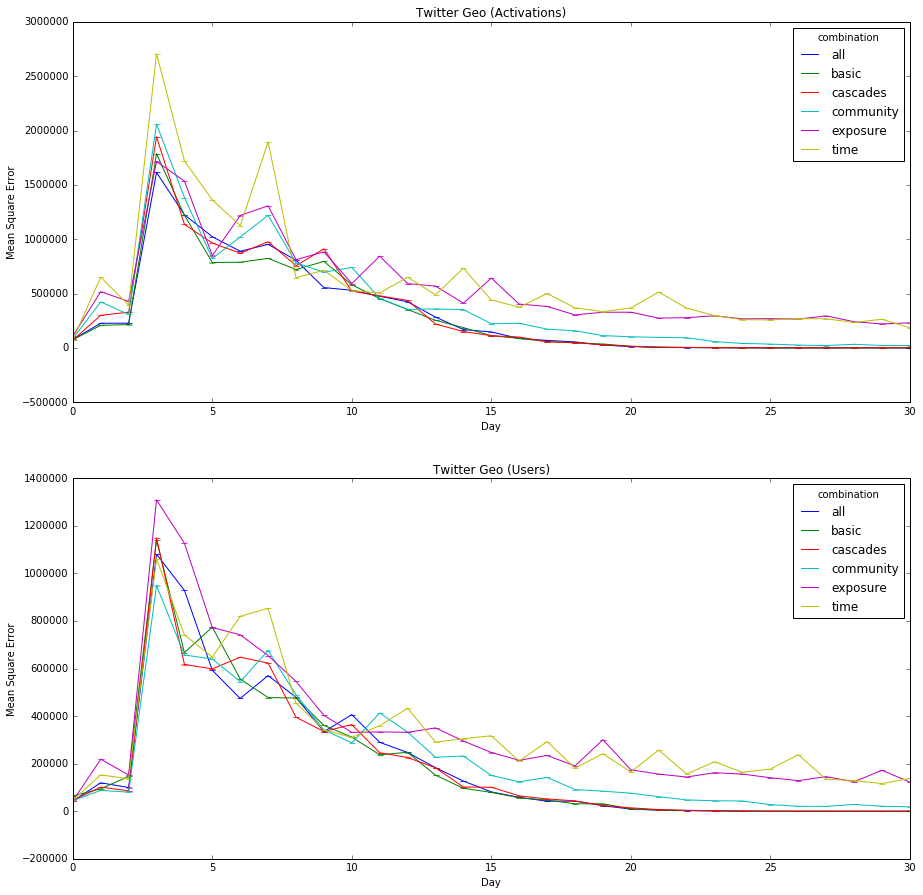

In [7]:
f, a = plt.subplots(2,1,figsize=(15,15))
ax = dft.T.xs('activation_target', axis=1).plot(ax=a[0], yerr=dft_error.T.xs('activation_target', axis=1))
ax.set_xlabel("Day")
ax.set_ylabel("Mean Square Error")
ax.set_title('Twitter Geo (Activations)')

ax = dft.T.xs('user_target', axis=1).plot(ax=a[1], yerr=dft_error.T.xs('user_target', axis=1))
ax.set_xlabel("Day")
ax.set_ylabel("Mean Square Error")
ax.set_title('Twitter Geo (Users)')

In [15]:
with open('/Users/danielkershaw/Downloads/part-00000 (9)') as data_file:
    for l in data_file:
        dft = json.loads(l)

In [16]:
dft

{u'file': u'http://scc-culture-mind.lancs.ac.uk:50070/user/kershad1/twitter/geo-split/test/zzc',
 u'name': u'zzc',
 u'raw': u'{"index":{"0":2,"1":3,"2":4,"3":5,"4":6,"5":7,"6":8,"7":9,"8":10,"9":11,"10":12,"11":13,"12":14,"13":15,"14":16,"15":17,"16":18,"17":19},"activateion_exposure":{"0":0.0,"1":1.0,"2":0.0,"3":0.0,"4":1.0,"5":2.0,"6":2.0,"7":2.0,"8":0.0,"9":3.0,"10":1.0,"11":4.0,"12":2.0,"13":2.0,"14":4.0,"15":5.0,"16":1.0,"17":10.0},"activation_entorpy":{"0":0.0,"1":0.6931471806,"2":1.0986122887,"3":1.0397207708,"4":1.3321790402,"5":1.3296613489,"6":1.2770342595,"7":1.3208883431,"8":1.3107836781,"9":1.2798542258,"10":1.3421131789,"11":1.3086053873,"12":1.4791328074,"13":1.6307991046,"14":1.6170531525,"15":1.6631355916,"16":1.6766961326,"17":1.7981055026},"community":{"0":0.0,"1":13.0,"2":1.0,"3":1.0,"4":5.0,"5":0.0,"6":0.0,"7":13.0,"8":1.0,"9":0.0,"10":5.0,"11":0.0,"12":8.0,"13":3.0,"14":1.0,"15":8.0,"16":8.0,"17":11.0},"degree":{"0":1083,"1":1591,"2":294,"3":1003,"4":1347,"5":823,